In [1]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re #to remove numbers form text

In [2]:
data = pd.read_csv("Data.csv")
data = data[data['score']!=3]

In [3]:
#creating a column to check whether text is positive or negative
#score>3 => positive
#score<3 => negative

def sentiment(score):
    if(score>3):
        return 1
    else:
        return -1
    
data['sentiment'] = data['score'].apply(sentiment)

In [4]:
#Taking a chunk of data to train and test our model
#we will use summary to train our models

df = pd.DataFrame()
df['text'] = data['summary'][:2500]
df['sentiment'] = data['sentiment'][:2500]

 1    2096
-1     404
Name: sentiment, dtype: int64


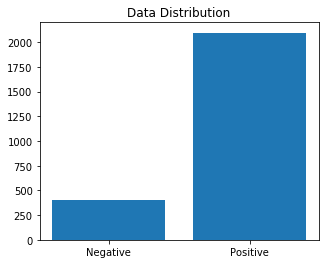

In [5]:
#observing overall data

x = df['sentiment'].value_counts()
p = x.iloc[0]
n = x.iloc[1]
fig = plt.figure(figsize =(5, 4))
plt.bar(["Negative","Positive"],[n,p])
plt.title("Data Distribution")
print(x)

In [6]:
df.head()

,text,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,"""Delight"" says it all",1
3,Cough Medicine,-1
4,Great taffy,1


Data preprocessing :-==============

In [7]:
#creating new data by taknig some positive and negative sentiment for better learning of model

pos = df[df['sentiment']==1].iloc[:1600]
neg = df[df['sentiment']==-1].iloc[:400]

df1 = pd.concat([pos,neg]).sample(frac=1)  #merging pos and neg and shufling it
df1 = df1.reset_index(drop=True)
df1.head()

,text,sentiment
0,"For the price, these are great for all. Even a...",1
1,so easy to use,1
2,Perfect for hard licorice lovers!,1
3,My new favorite chips!,1
4,Pop-Tarts Work of Art,1


In [8]:
#converting text in lower case and removing punctuatinos
def lower(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    return text.lower()

df1['text'] = df1['text'].apply(lower)

In [9]:
#Removing stopwords from text
stopword = stopwords.words('english')
stopword.append("good") #because good is used for both neg and pos response
stopword.append("chip")
stopword.append("chips")
def fun(text):
    tokenized_words = word_tokenize(text)
    l = []
    for w in tokenized_words:
        if w not in stopword:
            l.append(w)
    return ' '.join(l)

df1['text'] = df1['text'].apply(fun)

In [12]:
#removing numbers from text
def remove_numbers(text):
    return re.sub('[0-9]+', '', text)
df1['text'] = df1['text'].apply(remove_numbers)

In [13]:
df1['words'] = df1['text'].apply(word_tokenize)

From here on we are working on tokenized words

In [15]:
#word stemming using snowball stemmer

#NOTE: WE SHOULD STEMM WORDS AFTER TOKENIZING BCZ STEMMER IS NOT GOOD FOR SENTECNE

stemmer = SnowballStemmer(language='english')
def stemming(words):
    return [stemmer.stem(w) for w in words]

df1['words'] = df1['words'].apply(stemming)

In [16]:
#lammatizing words
lz = WordNetLemmatizer()
def lammatize(words):
    return [lz.lemmatize(w) for w in words]
df1['words'] = df1['words'].apply(lammatize)

In [17]:
df1.head()

,text,sentiment,words
0,price great even crowd much better smaller fla...,1,"[price, great, even, crowd, much, better, smal..."
1,easy use,1,"[easi, use]"
2,perfect hard licorice lovers,1,"[perfect, hard, licoric, lover]"
3,new favorite,1,"[new, favorit]"
4,poptarts work art,1,"[poptart, work, art]"


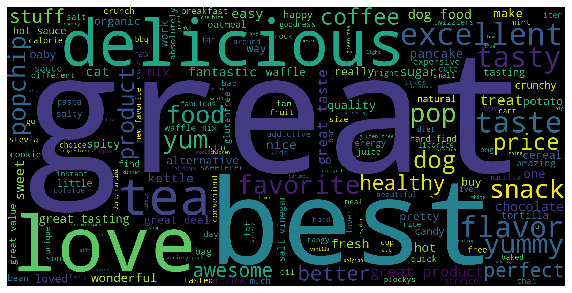

In [18]:
#printing positive word cloud

x = (df1[df1['sentiment']==1]['text'])
pos_string = " ".join(x)

fig = plt.figure(figsize =(10, 8))
wordcloud = WordCloud(width=1600,height=800).generate(pos_string)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

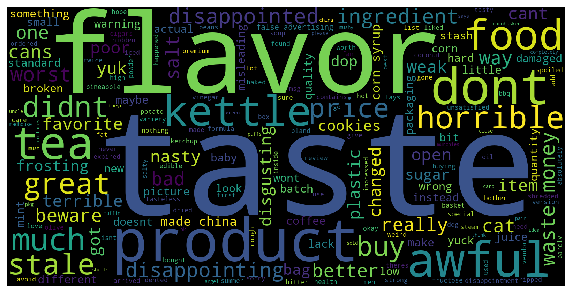

In [19]:
#printing negative wordcloud

x = (df1[df1['sentiment']==-1]['text'])
neg_string = " ".join(x)

fig = plt.figure(figsize =(10, 8))
wordcloud = WordCloud(width=1600,height=800).generate(neg_string)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [20]:
#creating a csv file so that we can import clean data to train models
df1.to_csv("clean_data.csv",index=False)